# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns
sns.set()

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


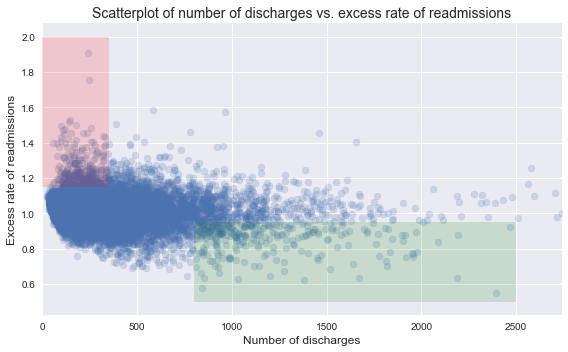

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# Your turn

<h2>Question A:</h2>
<h3>I do not completely agree with the above analysis and recommendations as this analysis is based on the scatter plot for only part of the data, also there could be many other factors influencing the readmission ratio at a given time</h3>

In [7]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [8]:
df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]
df = df.dropna()

In [9]:
less_discdf = df[df['Number of Discharges']< 100]
greater_discdf = df[df['Number of Discharges']> 1000]

<h1>Question B : Hypothesis Testing</h1>
<h2>Ho - There is no significant impact of Number of Discharges on Readmissions</h2>
<h2>Ha - There is a significant impact.</h2>

In [10]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [11]:
df = pd.concat([less_discdf,greater_discdf])
combined_mean = np.mean(df['Excess Readmission Ratio'])

less_discdf_shifted = less_discdf['Excess Readmission Ratio'] - np.mean(less_discdf['Excess Readmission Ratio'])+combined_mean

greater_discdf_shifted = greater_discdf['Excess Readmission Ratio'] - np.mean(greater_discdf['Excess Readmission Ratio'])+combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_less = draw_bs_reps(less_discdf_shifted,np.mean,10000)
bs_replicates_greater = draw_bs_reps(greater_discdf_shifted,np.mean,10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_less-bs_replicates_greater

# Compute the p-value
mean_diff = np.abs(np.mean(less_discdf['Excess Readmission Ratio']) - np.mean(greater_discdf['Excess Readmission Ratio']))
print('mean diff : ',mean_diff,', bs_diff_replicates : ',bs_diff_replicates)
p = np.sum(bs_diff_replicates > mean_diff)*1.0 / len(bs_diff_replicates)

# Print p-value
alpha = 0.01
if p < alpha: 
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

('mean diff : ', 0.04428292900204345, ', bs_diff_replicates : ', array([-0.00815341,  0.00049379,  0.0002901 , ...,  0.00026655,
       -0.00412733,  0.00672909]))
The null hypothesis can be rejected


# 2 Sample z-test

In [12]:
black_var = np.var(less_discdf['Excess Readmission Ratio'])

white_var = np.var(greater_discdf['Excess Readmission Ratio'])

denominator = np.sqrt(black_var/len(less_discdf['Excess Readmission Ratio']) + white_var/len(greater_discdf['Excess Readmission Ratio']))
mean_diff = np.abs(np.mean(less_discdf['Excess Readmission Ratio']) - np.mean(greater_discdf['Excess Readmission Ratio']))
z_val = mean_diff/denominator
p = stats.norm.sf(abs(z_val))*2

alpha = 0.01
    
if p < alpha: 
    print("The null hypothesis can be rejected with z test")
else:
    print("The null hypothesis cannot be rejected with z test")


The null hypothesis can be rejected with z test


# Alternate Plots

In [17]:
def ecdf(data):
    n = len(data)*1.0
    x = np.sort(data)
    y= np.arange(1,n+1)/n
    return x,y

def verifyECDF():
    x_less,y_less = ecdf(less_discdf['Excess Readmission Ratio'])
    
    x_grt,y_grt = ecdf(greater_discdf['Excess Readmission Ratio'])

    _ = plt.plot(x_less,y_less,marker='.',linestyle='none')
    _ = plt.plot(x_grt,y_grt,marker='.',linestyle='none')
    _ = plt.margins(0.02)
    _ = plt.xlabel('Readmission Ratio')
    _ = plt.ylabel('ECDF')
    _ = plt.rcParams['figure.figsize'] = [20, 15]
    _ = plt.legend(('< 100', '> 1000'), loc='lower right')
    plt.show()


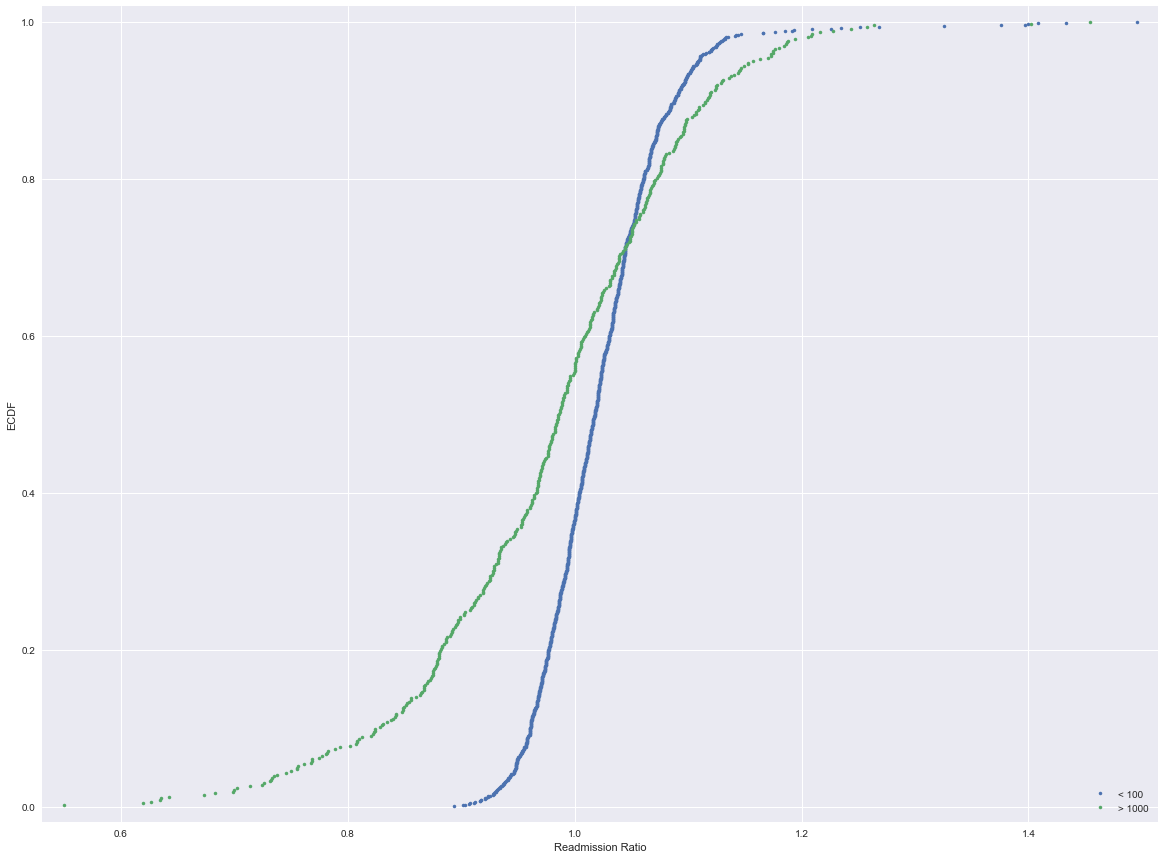

In [18]:
verifyECDF()

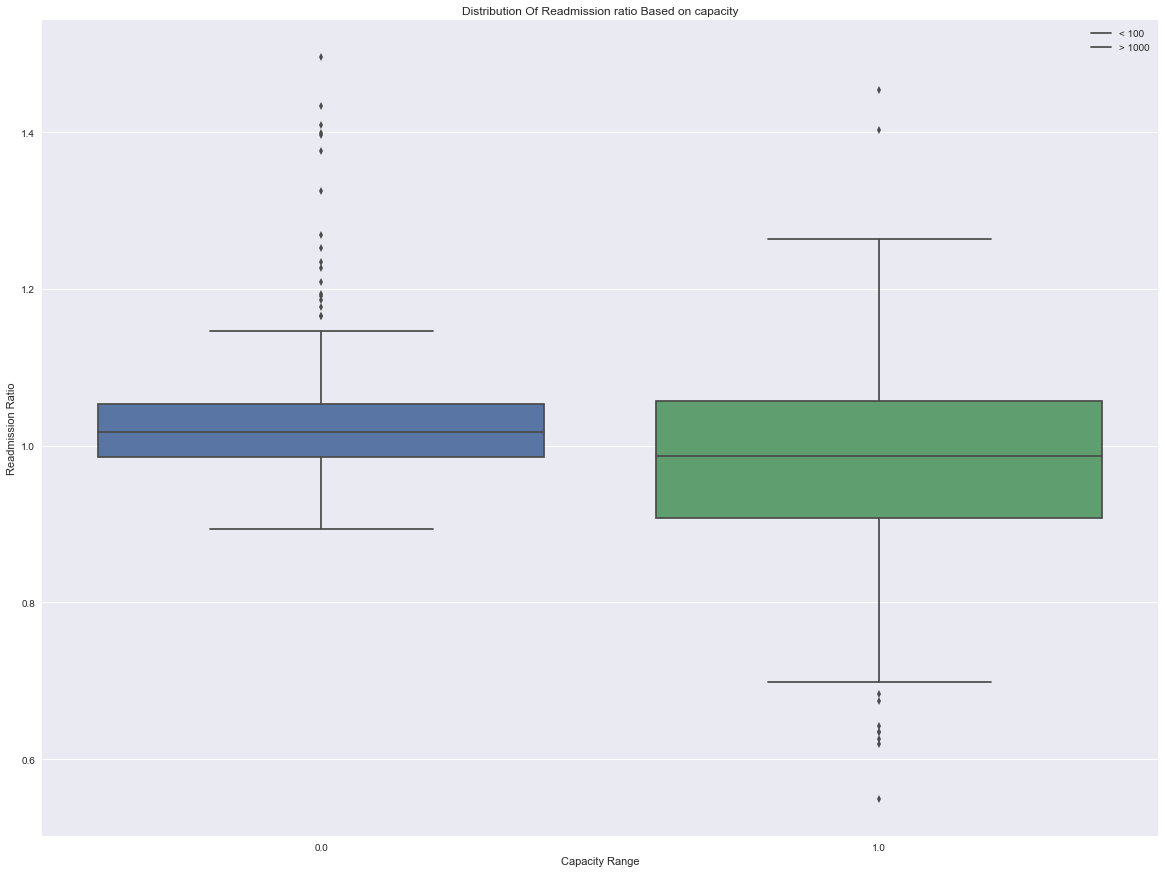

In [19]:
df.loc[df['Number of Discharges'] < 100,'capacity'] = 0 # capacity below 100
df.loc[df['Number of Discharges'] > 1000,'capacity'] = 1 # capacity above 1000
sns.boxplot(x='capacity',y='Excess Readmission Ratio',data=df)
plt.xlabel('Capacity Range')
plt.ylabel('Readmission Ratio')
plt.title('Distribution Of Readmission ratio Based on capacity')

plt.rcParams['figure.figsize'] = [20, 15]
plt.legend(labels=["< 100", "> 1000"])
plt.show()

<h3>Based on the ECDF and Box Plots we can conclude that lower Number of Discharges do not directly correlate to lower Readmission ratio i.e mean of readmission ratio for higher capacity is less than 1 as opposed to capacity less than 100</h3>


<h1>The observed p-value for above tests is close to 0.0</h1>
<h3>statistical significance suggests that there is a higher probability that null hypothesis is just bychance i.e there is a significant impact of number of discharges on readmissions</h3>
<h3>practical significance refers to significance of the variable in real world i.e number of discharges may not be the only factor that impacts readmission ratio</h3>
<h3>In this case the statistical and practical significance will differ, as in real world context there may be other factors influencing the readmission ratio,doctors with right qualifications, number of hospitals for population, distance of hospital facility to population, laws and policies of hospitals and governments, locations of hospital facilities,available pharmacy services</h3>

<h3></h3>
<h3>Recommendation to consolidate the facilities may not be effective, as consolidation may increase the distance of hospital facilities to the population making them out of reach, might lead increase in patients and poor service</h3>

<h3>Advantage of scatter plot above is it highlights correlation between the Number of Discharges and the readmission ratio</h3>
<h3>Disadvantage of above plot is, it does not show the trend for entire data, as the data seems to be missing for discharges higher than 2500</h3>
